# Exercise 5

Implement an Automatic Higher or Lower Game

Set the bounds to between 1 to 20. The Graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max limit of 7.

Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

Input: {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}

Hint: It will need to adjust its bounds after every guess based on the hint provided by the hint node.

In [34]:
import random
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END # start and end point
from IPython.display import Image, display

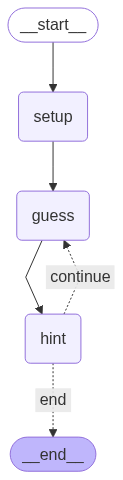

In [35]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    answer: int

def setup_node(state: AgentState) -> AgentState:
    state["player_name"] = f"Hi {state["player_name"]}."
    state["attempts"] = 0
    if not state["lower_bound"]: state["lower_bound"] = 1
    if not state["upper_bound"]: state["upper_bound"] = 20
    state["answer"] = random.randint(state["lower_bound"], state["upper_bound"]) # contain upper_bound
    return state

def guess_node(state: AgentState) -> AgentState:
    guess = random.randint(state["lower_bound"], state["upper_bound"])
    state["guesses"].append(guess)
    state["attempts"] += 1
    return state

def hint_node(state: AgentState) -> AgentState:
    guess = state["guesses"][-1]
    if guess > state["answer"]:
        print(f"Your guess is {guess}. Too high!")
        state["upper_bound"] = guess - 1
    elif guess < state["answer"]:
        print(f"Your guess is {guess}. Too low!")
        state["lower_bound"] = guess + 1
    else:
        print(f"Right answer! The answer is {state["answer"]}.")
    return state

# router function
def router(state: AgentState):
    if state["guesses"][-1] == state["answer"]:
        return "end"
    elif state["attempts"] > 7: 
        return "end"
    else: 
        return "continue"

graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint",
    router,
    {
        "continue": "guess",
        "end": END,
    }
)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
input = {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}
app.invoke(input)

Your guess is 3. Too low!
Your guess is 16. Too high!
Right answer! The answer is 8.


{'player_name': 'Hi Student.',
 'guesses': [3, 16, 8],
 'attempts': 3,
 'lower_bound': 4,
 'upper_bound': 15,
 'answer': 8}